In [1]:
from tensorflow.python import keras

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Conv2D
from tensorflow.python.keras.layers import MaxPooling2D
from tensorflow.python.keras.layers import Dropout
from tensorflow.python.keras.layers import Flatten
from tensorflow.python.keras.datasets import mnist 
(x_train, y_train), (x_test, y_test) = mnist.load_data() 

In [2]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(rate = 0.3))
model.add(Dense(10, activation = 'softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total para

In [4]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adadelta()) 

In [5]:
x_train= x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test  = keras.utils.to_categorical(y_test, num_classes=10)

In [6]:
model.fit(x_train,y_train,epochs = 5, batch_size = 64)


Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 9s 145us/sample - loss: 1.0820
Epoch 2/5
60000/60000 [==============================] - 7s 110us/sample - loss: 0.0708
Epoch 3/5
60000/60000 [==============================] - 6s 106us/sample - loss: 0.0454
Epoch 4/5
60000/60000 [==============================] - 7s 109us/sample - loss: 0.0330
Epoch 5/5
60000/60000 [==============================] - 6s 108us/sample - loss: 0.0250


Text(0.5, 1.0, 'My Guess is: 3')

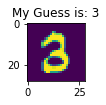

In [13]:
import random
sub = plt.subplot(2,5,10)
img = x_test[random.randrange(0,len(x_test))].reshape(28,28)
imgs = plt.imshow(img)
img = img.reshape(-1,28,28,1)
out = model.predict(img)
sub.set_title("My Guess is: " + str(np.argmax(out)))
